<a href="https://colab.research.google.com/github/manikbali/gsics/blob/main/Deliverable_GIRO_SRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Spectral Response Function (SRF) for GIRO
*Notebook By Manik Bali, ESSIC/UMD*

Deliverable submitted by Masaya Takahashi, JMA in support of the GIRO


We present here a python platform built on Google Colab, aimed to help users use visualize the Spectral Response Functions used in the GIRO Model.
 This has python codes that can help you

1. Pick a SRF  directly from  [SRF wiki Page](http://gsics.atmos.umd.edu/bin/view/Development/Srf4Giro)
2. Extract variables from the SRF NetCDF files
3. Plot extracted SRF

**Features of GSICS User Google Colab Platform**:

Google Colab is a collaborative development environment. Its a Paradigm shift in the manner in which GSICS data and code are being shared. Here we are sharing data with a working instance of the algorithm and a python code.
Members accessing this colab can contribute their modules to the Colab notebook as well as pick up code from here (under the GSICS GPL)

Currently accessible by most of the GSICS member agencies. It gives a python run time environment directly in your browser. The platform is shareable, comes free and has cloud computing resources inbuilt into it.
GSICS members can make contributions of code directly into the colab library.

**How to Read and plot variables from the SRF Data File**

1.  File-> Save a Copy in Drive
2.  On another tab, go to the [SRF wiki Page](http://gsics.atmos.umd.edu/bin/view/Development/Srf4Giro)
3.   Right click on the hyperlink of the SRF file and copy the link address.
4.   Save this link and come back to your saved notebook and paste this link the url feild below ( scroll down to see the spot)
5.   From the top menu of the Colab Press Runtime->Run All
6.  Scroll down to see the results


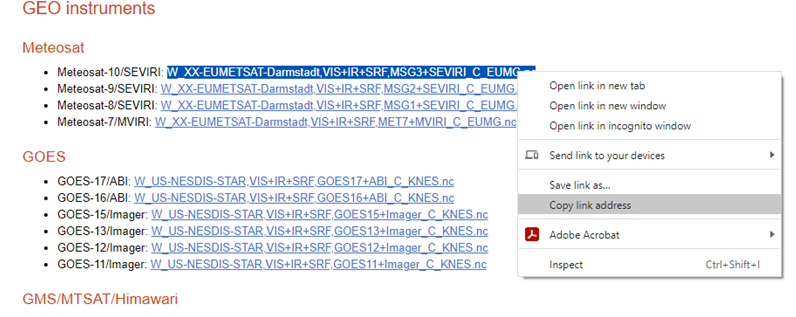

**References**

EUMETSAT GSICS Product User Guide [link](https://www.eumetsat.int/website/wcm/idc/idcplg?IdcService=GET_FILE&dDocName=PDF_DMT_803180&RevisionSelectionMethod=LatestReleased&Rendition=Web)

**Paste the url link copied from**

In [ ]:
#url="http://gsics.atmos.umd.edu/pub/Development/Srf4Giro/W_XX-EUMETSAT-Darmstadt,VIS+IR+SRF,MSG3+SEVIRI_C_EUMG.nc" # URL extract from above
#url="http://gsics.atmos.umd.edu/pub/Development/Srf4Giro/W_XX-EUMETSAT-DarmstadtVISIRSRFMSG3SEVIRI_C_EUMG.nc"
url="http://gsics.atmos.umd.edu/pub/Development/Srf4Giro/W_CN-CMA-NSMCVISIRSRFFY2FSVISSR_C_BABJ.nc"  # Paste Url here and press Runtime-> Run all
iasi_url="http://gsics.eumetsat.int/thredds/fileServer/metopb-iasi/W_XX-EUMETSAT-Darmstadt,HYPERSPECT+SOUNDING,MetOpB+IASI_C_EUMP_20230314231607_54416_eps_o_l1.nc"
#url="http://gsics.atmos.umd.edu/pub/Development/Srf4Giro/W_IN-IMD-NSMCIRSRFINSAT3DSOUNDER_C_DEMS.nc"

In [ ]:
!pip install netCDF4
!pip install julian
!pip install cftime

import netCDF4 as nc4
import numpy as np
import matplotlib.pyplot as plt
import datetime
import urllib.request
from datetime import date
import julian
import matplotlib
from cftime import num2pydate
from netCDF4 import num2date
import pandas as pd
from datetime import datetime
import urllib.request
import os.path


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for julian: filename=julian-0.14-py3-none-any.whl size=2631 sha256=d8c4085a883244c7d997f8955b3441b85cebe0069e4cb770051ee95493031d40
  Stored in directory: /root/.cache/pip/wheels/ac/43/c7/fc558ec7c502b57cf2e925b95b6686ff5553da0c60339cf8b3
Successfully built julian
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#url="http://gsics.eumetsat.int/thredds/fileServer/msg4-seviri-prime-demo-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG4+SEVIRI-PRIME_C_EUMG_20150908000000_demo_00.nc"

url1, nc_file=  os.path.split(url)
urllib.request.urlretrieve(url, nc_file)


('W_CN-CMA-NSMCVISIRSRFFY2FSVISSR_C_BABJ.nc',
 <http.client.HTTPMessage at 0x7f422e2020d0>)

In [ ]:
fn = '/path/to/file.nc4'
ds = nc4.Dataset(nc_file)

In [ ]:
print("Contents of the SRF File")
print(ds)

Contents of the SRF File
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (v24, 27 June 2013)
    project: Global Space-based Inter-Calibration System <http://gsics.wmo.int>
    license: This file was produced in support of GSICS activities and thus is not meant for public use although the data is in the public domain. Any publication using this file should acknowledge both GSICS and the data's relevant organization. Neither the data creator, nor the data publisher, nor any of their employees or contractors, makes any warranty, express or implied, including warranties of merchantability and fitness for a particular purpose, or assumes any legal liability for the accuracy, completeness, or usefulness, of this information.
    title: FY-2F S-VISSR Normalized Spectral Response Data
    summary: Normalized spectral respon

In [ ]:
with nc4.Dataset(nc_file,'r') as ncid:
     wavelength      = ncid.variables['wavelength'][:][:] # Wavelength
     wavenumber      = ncid.variables['wavenumber'][:][:] # Wavenumber
     channel_id    = ncid.variables['channel_id'][:] # Channel_ID
     channel       = ncid.variables['channel'][:] # Channel
     origin        = ncid.variables['origin'][:] # Origin
     srf           =ncid.variables['srf'][:][:] # SRF

In [ ]:
print(ds.platform)

FY-2F


In [ ]:
ttitle="Spectral Response Function [" + ds.platform + " / " +ds.instrument + " ]"

In [ ]:
cf=np.array(channel)
cf=np.around(cf,decimals=3)
cfreq = [[str(freq)] + [u"\u03bcm"] for freq in cf  ]
cfreq = [ ' '.join(freq) for freq in cfreq ]
cfreq=[ ''.join(cfreq[fr]) for fr in range(len(cfreq))]

Text(0, 0.5, 'Response')

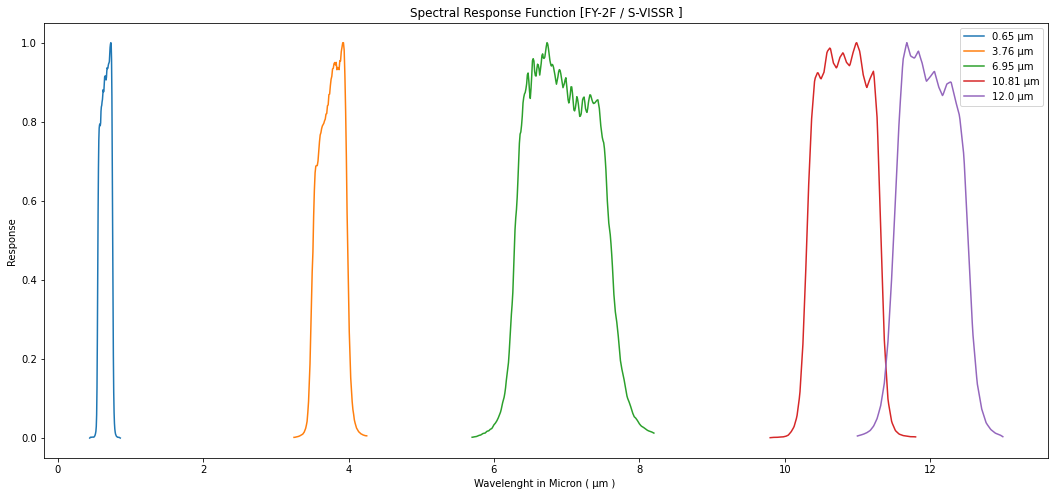

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(wavelength,srf)
plt.title(ttitle)
plt.legend(cfreq)
plt.xlabel('Wavelength in Micron ( \u03bcm ) ')
plt.ylabel('Response')


In [ ]:
#colab_ui()